<img src="dataset/IQR.png" hwight=500 width=500 />
<img src="dataset/box-plot.png" height=500 width=500 />

### IQR Proximity Rule
According to the IQR proximity rule, a value is an outlier if it falls outside these boundaries: Upper boundary = 75th quantile + (IQR * 1.5) Lower boundary = 25th quantile - (IQR * 1.5) Here, IQR is given by the following equation: IQR = 75th quantile - 25th quantile.

This method is used to detecting a skewed distribution feature's outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
423,8.27,26.0,0
102,5.92,22.0,1
388,7.28,23.0,0
726,7.93,25.0,0
884,7.11,4.0,1


In [5]:
print("skewnes of cgpa is: ",df['cgpa'].skew())
print("skewnes of placement_exam_marks is: ",df['placement_exam_marks'].skew())

skewnes of cgpa is:  -0.014529938929314918
skewnes of placement_exam_marks is:  0.8356419499466834


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

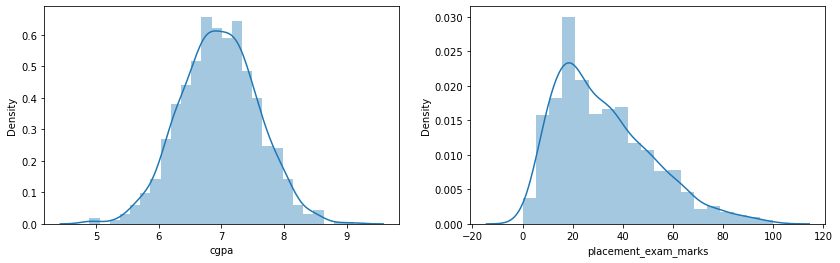

In [6]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df['cgpa'], ax=ax1)

sns.distplot(df['placement_exam_marks'], ax=ax2)
plt.show()

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='placement_exam_marks'>

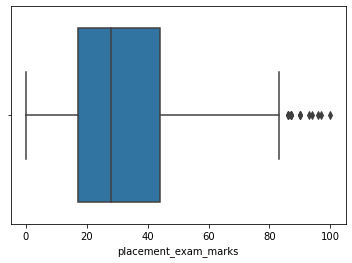

In [8]:
sns.boxplot(df['placement_exam_marks']) # this feature is right skewed so outliers are on the right side

In [9]:
# Finding the IQR
percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
print(percentile_25)
print(percentile_75)

17.0
44.0


In [11]:
IQR = percentile_75-percentile_25

In [12]:
IQR

27.0

In [13]:
upper_limit = percentile_75+1.5*IQR
lower_limit = percentile_25-1.5*IQR

In [14]:
print("Upper limit will be ",upper_limit)
print("Lower limit will be ",lower_limit)

Upper limit will be  84.5
Lower limit will be  -23.5


## Finding Outliers

In [15]:
df[df['placement_exam_marks'] > upper_limit] # so there are 15 outliers
# so these students score the number greater than our desinated value

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df['placement_exam_marks'] < lower_limit] # there is no lower outlier because our minimum value is already 0

,cgpa,placement_exam_marks,placed


# Trimming

In [17]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape # so here were 15 outliers which i removed

(985, 3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

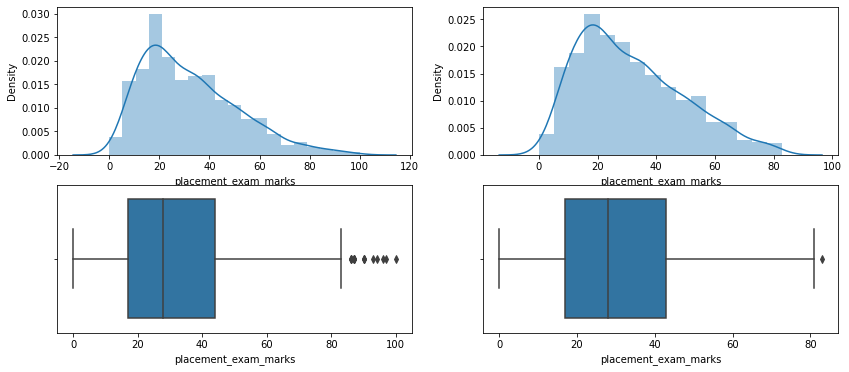

In [18]:
# comparing
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.distplot(df['placement_exam_marks'], ax=ax1) # distribution before removing outliers
sns.distplot(new_df['placement_exam_marks'], ax=ax2) # distribution after removing outliers

sns.boxplot(df['placement_exam_marks'], ax=ax3) # boxplot view with outliers
sns.boxplot(new_df['placement_exam_marks'], ax=ax4) # boxplot view without outliers
plt.show()

# Capping

In [19]:
df2 = df.copy()

In [21]:
df2['placement_exam_marks'] = np.where(
            df['placement_exam_marks'] > upper_limit,
            upper_limit,
            np.where(df['placement_exam_marks'] < lower_limit,
            lower_limit,
                    df['placement_exam_marks']))

In [24]:
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

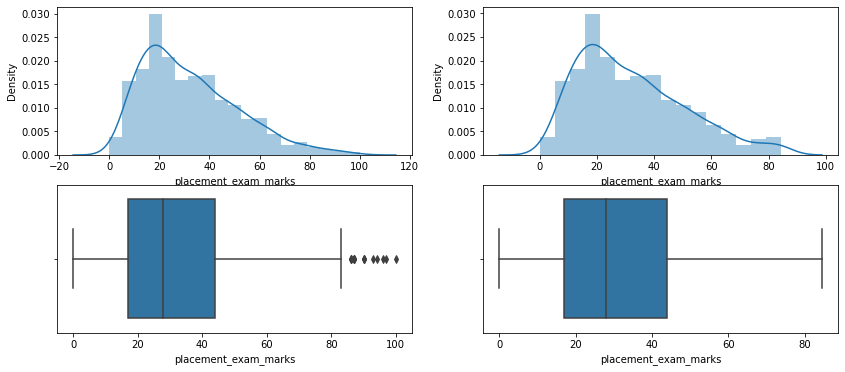

In [25]:
# comparing
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.distplot(df['placement_exam_marks'], ax=ax1) # distribution before removing outliers
sns.distplot(df2['placement_exam_marks'], ax=ax2) # distribution after removing outliers

sns.boxplot(df['placement_exam_marks'], ax=ax3) # boxplot view with outliers
sns.boxplot(df2['placement_exam_marks'], ax=ax4) # boxplot view without outliers
plt.show()

In [26]:
# so you can see that the outliers are now completely removed but the distribution from the right end is
# going to up this is because i replaced all of the values which are greater than my upper limit i replace with
# upper limit